In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor

In [11]:
X = np.load('../initial_data/function_1/initial_inputs.npy')
Y = np.load('../initial_data/function_1/initial_outputs.npy')

## Random Search

In [12]:
next_query = np.random.uniform(size=2)
print(next_query)

[0.25472204 0.58453435]


## Upper Confidence Bound

In [13]:
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

# use gridsearch to optimise the acquisition function
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)

X_grid = []
for i in range(len(x1)):
    for j in range(len(x2)):
        X_grid.append([x1[i], x2[j]])

X_grid = np.array(X_grid)
mean, std = gpr.predict(X_grid, return_std=True)
ucb = mean + 1.96 * std

print(f"ucb: {ucb}")
print(f"mean: {mean}")
print(f"std: {std}")

idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
print(f"next_query: {'-'.join(['%.6f' % x for x in next_query])}")

ucb: [0.05708616 0.0558093  0.05454802 ... 0.02749513 0.02768512 0.0279074 ]
mean: [-0.00126973 -0.00091448 -0.00057032 ... -0.01217665 -0.01317669
 -0.01422875]
std: [0.02977341 0.02894071 0.0281216  ... 0.0202407  0.02084786 0.02149804]
next_query: 0.000000-1.000000


## Visualising the data

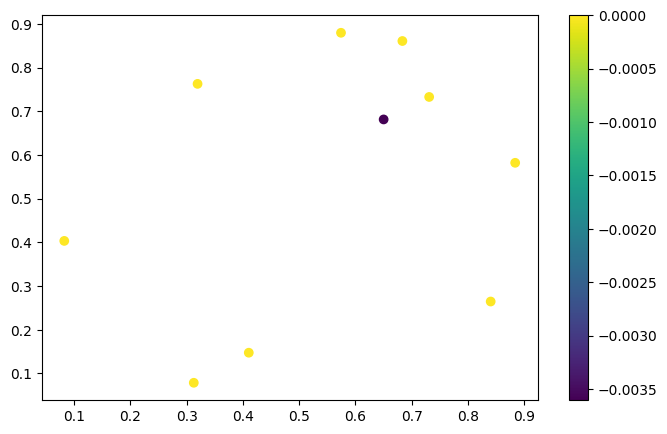

In [14]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.colorbar()

In [15]:
# Use a restricted UCB
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

# use gridsearch to optimise the acquisition function
x1 = np.linspace(0.6, 0.65, 100)
x2 = np.linspace(0.65, 0.69, 100)

X_grid = []
for i in range(len(x1)):
    for j in range(len(x2)):
        X_grid.append([x1[i], x2[j]])

X_grid = np.array(X_grid)
mean, std = gpr.predict(X_grid, return_std=True)
ucb = mean + 1.96 * std

print(f"ucb: {ucb}")
print(f"mean: {mean}")
print(f"std: {std}")

idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]

print(f"next_query: {'-'.join(['%.6f' % x for x in next_query])}")

ucb: [-0.00529816 -0.00528357 -0.00526879 ... -0.00320908 -0.00318845
 -0.00316785]
mean: [-0.00627446 -0.00626706 -0.00625963 ... -0.00348133 -0.00347441
 -0.00346748]
std: [0.00049811 0.00050178 0.00050553 ... 0.0001389  0.0001459  0.00015287]
next_query: 0.650000-0.650000
